<h1><b>FINAL PROJECT UJIAN AKHIR SEMESTER GENAP</b></h1>

<h2><b>Big Data And Predictive Analytics</b></h2>

<h5>Anggota Kelompok :</h5>
<ol>
    <li><p>Haikal Raditya Fadhilah</p></li>
    <li><p>Wulan Kristiyanti</p></li>
    <li><p>Gilang Ramadhani</p></li>
    <li><p>Widdia Glory Anggrenny</p></li>
</ol>


<h2><b>IMPORT LIBRARY</b></h2>

In [1128]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_error
from sklearn.model_selection import train_test_split

<h2><b>IMPORT DATASET</b></h2>


In [1129]:
df = pd.read_csv('./DATASET/house_price.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


<h3><b>MEMPERSIAPKAN DATA</b></h3>
<p><b>1) Melihat Jumlah Baris Dan Column Dataset</b></p>

In [1130]:
df.shape

(4600, 18)

<p><b>2) Melihat tipe data tiap kolom dari dataset</b></p>

In [1131]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

<p><b>3 Melihat data kolom apakah ada yang terdapat data kosong (NA) dan menghitung serta membersihkan data NULL</b></p>

In [1132]:
df.isna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<p><b>4 Melihat Jumlah Data Yang Kosong Atau NA</b></p>

In [1133]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<p><b>5 Menghilangkan kolom yang tidak di gunakan</b></p>

In [1134]:
df
df.drop(columns=['floors','waterfront','yr_renovated','street','city','country','statezip','sqft_basement'],inplace=True)

<h3><b>EDA (Exploratory Data Analytics)</b></h3>
<p><b>1.Print DataFrame</b></p>

In [1135]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,0,3,1340,1955
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,4,5,3370,1921
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,0,4,1930,1966
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,0,4,1000,1963
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,0,4,1140,1976
...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,0,4,1510,1954
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,0,3,1460,1983
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,0,3,3010,2009
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,0,3,1070,1974


<p><b>2.Melihat 10 Data Teratas</b></p>

In [1136]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,0,3,1340,1955
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,4,5,3370,1921
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,0,4,1930,1966
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,0,4,1000,1963
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,0,4,1140,1976
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,0,3,880,1938
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,0,3,1350,1976
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,0,3,2710,1989
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,0,4,1570,1985
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,0,3,1520,1945


<p><b>3.Melihat 10 Data Terakhir</b></p>

In [1137]:
df.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
4590,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,8331,0,3,2620,1991
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,0,4,940,1945
4592,2014-07-08 00:00:00,252980.000000,4.0,2.50,2530,8169,0,3,2530,1993
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,0,3,2538,2013
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,0,3,1610,1994
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,0,4,1510,1954
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,0,3,1460,1983
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,0,3,3010,2009
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,0,3,1070,1974
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,0,4,1490,1990


<p><b>3.Melihat Nama-nama Column Dari Dataset</b></p>

In [1138]:
df.columns  

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'view', 'condition', 'sqft_above', 'yr_built'],
      dtype='object')

<p><b>4.Melihat Informasi column dataset</b></p>

In [1139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4600 non-null   object 
 1   price        4600 non-null   float64
 2   bedrooms     4600 non-null   float64
 3   bathrooms    4600 non-null   float64
 4   sqft_living  4600 non-null   int64  
 5   sqft_lot     4600 non-null   int64  
 6   view         4600 non-null   int64  
 7   condition    4600 non-null   int64  
 8   sqft_above   4600 non-null   int64  
 9   yr_built     4600 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 359.5+ KB


<p><b>5.Melihat deskripsi dari dataset</b></p>

In [1140]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,0.240652,3.451739,1827.265435,1970.786304
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.778405,0.677230,862.168977,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,0.000000,1.000000,370.000000,1900.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,0.000000,3.000000,1190.000000,1951.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,0.000000,3.000000,1590.000000,1976.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,0.000000,4.000000,2300.000000,1997.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,4.000000,5.000000,9410.000000,2014.000000


<p><b>6 Membersihkan data yang tidak logis</b></p>
<ul>
    <li>Harga rumah yang nilainya = 0</li>
</ul>

In [1141]:
#Menghapus Baris Data Yang Nilai Kolom Harganya 0
df = df[df['price'] > 0].sort_values('price')
df.reset_index(drop=True,inplace=True)
df.shape

(4551, 10)

<p><b>7 Membersihkan Data Outliers</b></p>

In [1142]:
#Membuat Fungsi Untuk Membersihkan Outliers
def clear_outliers (dataset,kolom):
    Q1 = dataset[kolom].quantile(0.25)
    Q3 = dataset[kolom].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR;
    max_iqr = Q3 + 1.5 * IQR;
    return dataset.loc[(dataset[kolom] >= min_iqr) & (dataset[kolom] <= max_iqr)].reset_index(drop=True)

In [1143]:
# Membersihkan Data Outliers Pada Kolom Sqft Living
df = clear_outliers(df,'sqft_living');

In [1144]:
# Membersihkan Data Outliers Pada Kolom Sqft Living
df = clear_outliers(df,'sqft_lot');

In [1145]:
# Membersihkan Data Outliers Pada Kolom Sqft above
df = clear_outliers(df,'sqft_above');

In [1146]:
df = clear_outliers(df,'price');

In [1147]:
# Mengurutkan Data Berdasarkan Kolom Harga Secara Ascending Serta Mereset Index
df.sort_values('price',ascending=True,inplace=True)
df.reset_index(inplace=True,drop=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
0,2014-05-06 00:00:00,7800.0,2.0,1.00,780,16344,0,1,780,1942
1,2014-05-23 00:00:00,80000.0,1.0,0.75,430,5050,0,2,430,1912
2,2014-05-29 00:00:00,83000.0,2.0,1.00,900,8580,0,3,900,1918
3,2014-05-20 00:00:00,83300.0,3.0,2.00,1490,7770,0,4,1490,1990
4,2014-06-01 00:00:00,84350.0,4.0,2.00,2630,16475,0,4,2630,1953
...,...,...,...,...,...,...,...,...,...,...
3691,2014-07-08 00:00:00,1050000.0,4.0,2.75,2250,3433,0,3,1500,1927
3692,2014-05-22 00:00:00,1050000.0,4.0,2.50,3030,12590,0,4,3030,1988
3693,2014-07-02 00:00:00,1054690.0,4.0,3.50,3390,3979,0,3,2610,2014
3694,2014-05-14 00:00:00,1058000.0,4.0,2.00,2290,11137,0,4,2290,1955


<p><b>8 Melihat Deskripsi Data Setelah Di Bersihkan Dari Data Outliers</b></p>

In [1148]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
count,3.696000e+03,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000
mean,4.642214e+05,3.304654,2.033347,1899.755411,7171.584957,0.140422,3.452381,1624.339827,1969.595509
std,1.968653e+05,0.866293,0.679803,677.357617,3551.629350,0.567529,0.671399,636.435672,30.384475
min,7.800000e+03,1.000000,0.750000,370.000000,638.000000,0.000000,1.000000,370.000000,1900.000000
25%,3.099500e+05,3.000000,1.500000,1380.000000,4734.750000,0.000000,3.000000,1140.000000,1949.000000
50%,4.330556e+05,3.000000,2.000000,1840.000000,7100.000000,0.000000,3.000000,1460.000000,1972.000000
75%,5.850000e+05,4.000000,2.500000,2340.000000,9226.250000,0.000000,4.000000,2002.250000,1997.000000
max,1.059500e+06,9.000000,5.250000,4250.000000,19126.000000,4.000000,5.000000,3550.000000,2014.000000


<p><b>9 Melihat Korelasi Setiap Variabel</b></p>

In [1149]:
df.corr()

/tmp/ipykernel_5522/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
price,1.000000,0.278725,0.423044,0.582906,-0.014672,0.233052,0.075860,0.459256,-0.008554
bedrooms,0.278725,1.000000,0.497676,0.624820,0.209819,0.058286,0.020762,0.468285,0.145564
bathrooms,0.423044,0.497676,1.000000,0.699515,-0.016647,0.108689,-0.149132,0.612159,0.526210
sqft_living,0.582906,0.624820,0.699515,1.000000,0.224737,0.172807,-0.064778,0.815169,0.308506
sqft_lot,-0.014672,0.209819,-0.016647,0.224737,1.000000,0.066522,0.115684,0.182637,-0.026140
view,0.233052,0.058286,0.108689,0.172807,0.066522,1.000000,0.047740,0.041042,-0.075146
condition,0.075860,0.020762,-0.149132,-0.064778,0.115684,0.047740,1.000000,-0.211293,-0.407354
sqft_above,0.459256,0.468285,0.612159,0.815169,0.182637,0.041042,-0.211293,1.000000,0.459526
yr_built,-0.008554,0.145564,0.526210,0.308506,-0.026140,-0.075146,-0.407354,0.459526,1.000000


<h3><b>VISUALIASI DATA</b></h3>


<p><b>1 Melihat Jumlah Data Rumah Berdasarkan Kondisinya</b></p>

In [1150]:
# Mengseleksi Data Serta Menghitung Jumlah Data Rumah Berdasarkan Kondisi Rumah
kondisi_rumah = df['condition'].value_counts().rename_axis('kondisi').reset_index(name='jumlah')
numeric_condition = [1,2,3,4,5];
string_condition = ['Sangat Buruk','Buruk','Sedang','Bagus','Sangat Bagus']
kondisi_rumah['kondisi'].replace(numeric_condition,string_condition,inplace=True);

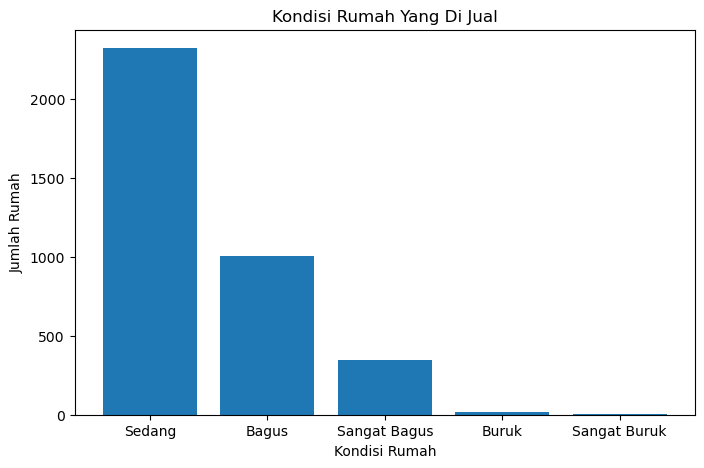

In [1151]:
# Membuat Bar Plot Untuk Mevisualisasikan Jumlah Data Rumah Setiap Kondisi
fig = plt.subplots(figsize=(8,5))
plt.bar(kondisi_rumah['kondisi'],kondisi_rumah['jumlah'],)
plt.title('Kondisi Rumah Yang Di Jual')
plt.ylabel('Jumlah Rumah')
plt.xlabel('Kondisi Rumah')
plt.show()

<p><b>2 Memvisualisasikan Data Harga Minimun Rumah Dari Tahun Ke Tahun</b></p>

In [1152]:
# Mengambil Dan Mengelompokkan Data Harga Dan Ukuran Properti Rumah Minimal Berdasarkan Tahun
tahun_buat = df[['yr_built','sqft_lot','price']].groupby('yr_built',as_index=False).min()

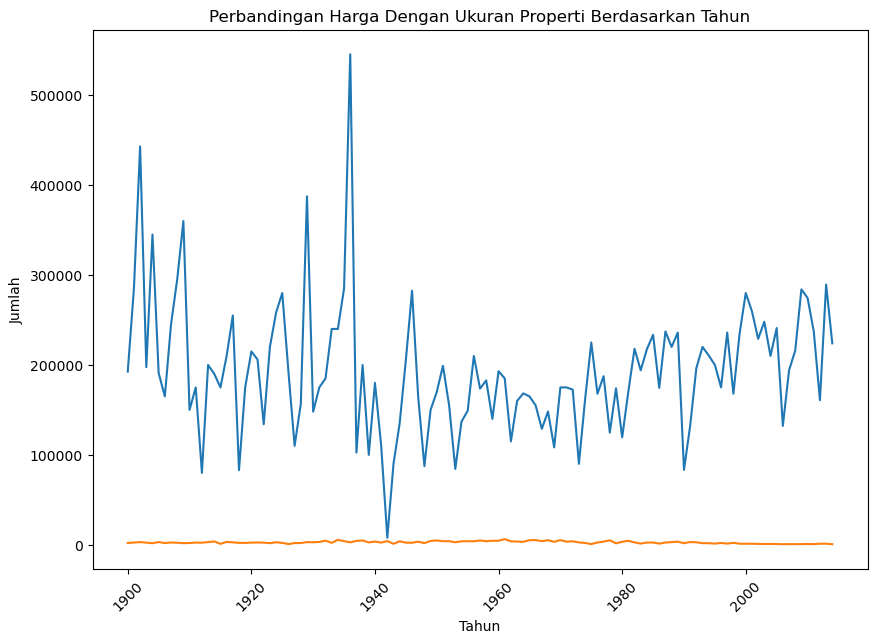

In [1153]:
# Menvisualisasikan Antara Harga Rumah Den Ukuran properti Berdasarkan Tahun Dengan Line Chart
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(tahun_buat['yr_built'],tahun_buat['price']);
ax.plot(tahun_buat['yr_built'],tahun_buat['sqft_lot']);
plt.xticks(rotation=45)
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.title("Perbandingan Harga Dengan Ukuran Properti Berdasarkan Tahun")
plt.show()

<p><b>3 Memvisualisasikan Data Jumlah Rumah Yang Di Bangun Berdasarkan Tahun</b></p>

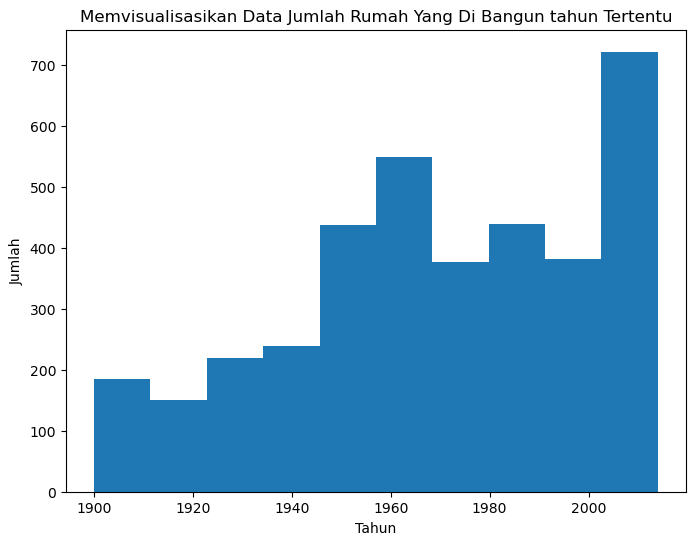

In [1154]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df['yr_built'])
plt.title("Memvisualisasikan Data Jumlah Rumah Yang Di Bangun tahun Tertentu")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

<p><b>4 Memvisualisasi Jumlah Data Rumah Berdasarkan Square Foot Living,Lot,Above</b></p>

Text(0.5, 1.0, 'Grafik Histogram Kolom Square Foot Above')

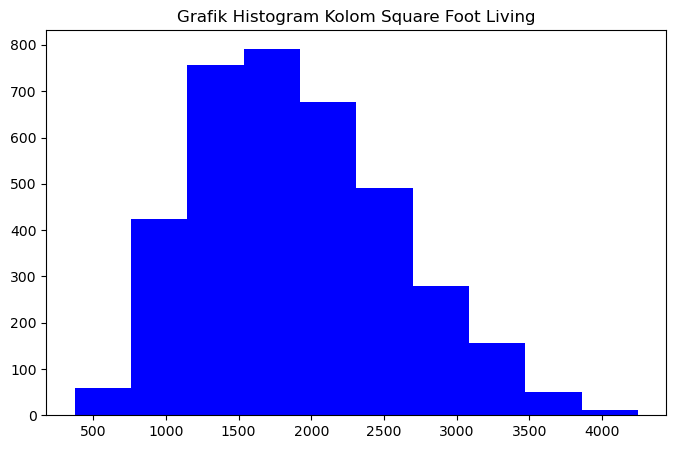

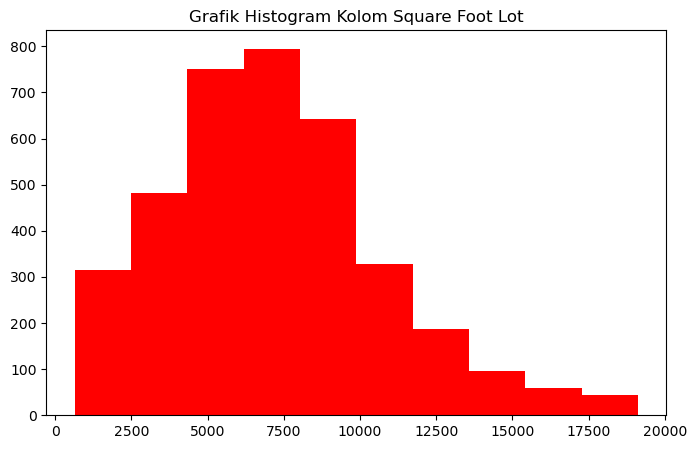

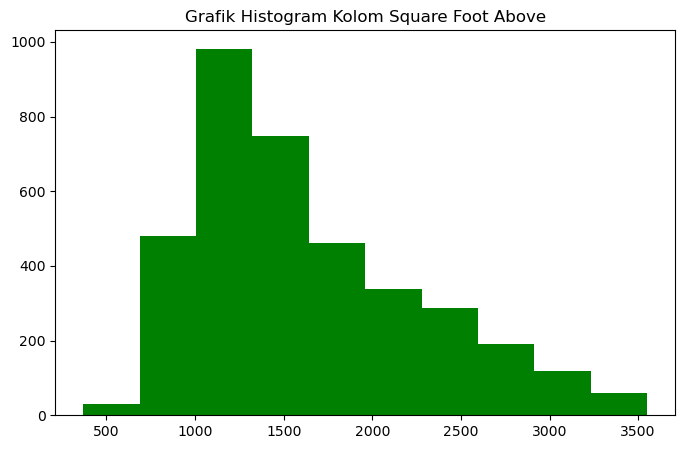

In [1155]:
# Visualisasi Data Kolom Square Living Dengan Histogram
df.hist(column='sqft_living',grid=False, figsize=(8,5),zorder=2,color="b")
plt.title("Grafik Histogram Kolom Square Foot Living")
# Visualisasi Data Kolom Square Lot Dengan Histogram
df.hist(column='sqft_lot',grid=False, figsize=(8,5),zorder=2,color="r")
plt.title("Grafik Histogram Kolom Square Foot Lot")
# Visualisasi Data Kolom Square Above Dengan Histogram
df.hist(column='sqft_above',grid=False, figsize=(8,5),zorder=2,color="g")
plt.title("Grafik Histogram Kolom Square Foot Above")

<p><b>5 Memvisualisasikan Data Kolom Price Dengan Square Foot Living Dan Price Dengan Square Foot Lot</b></p>

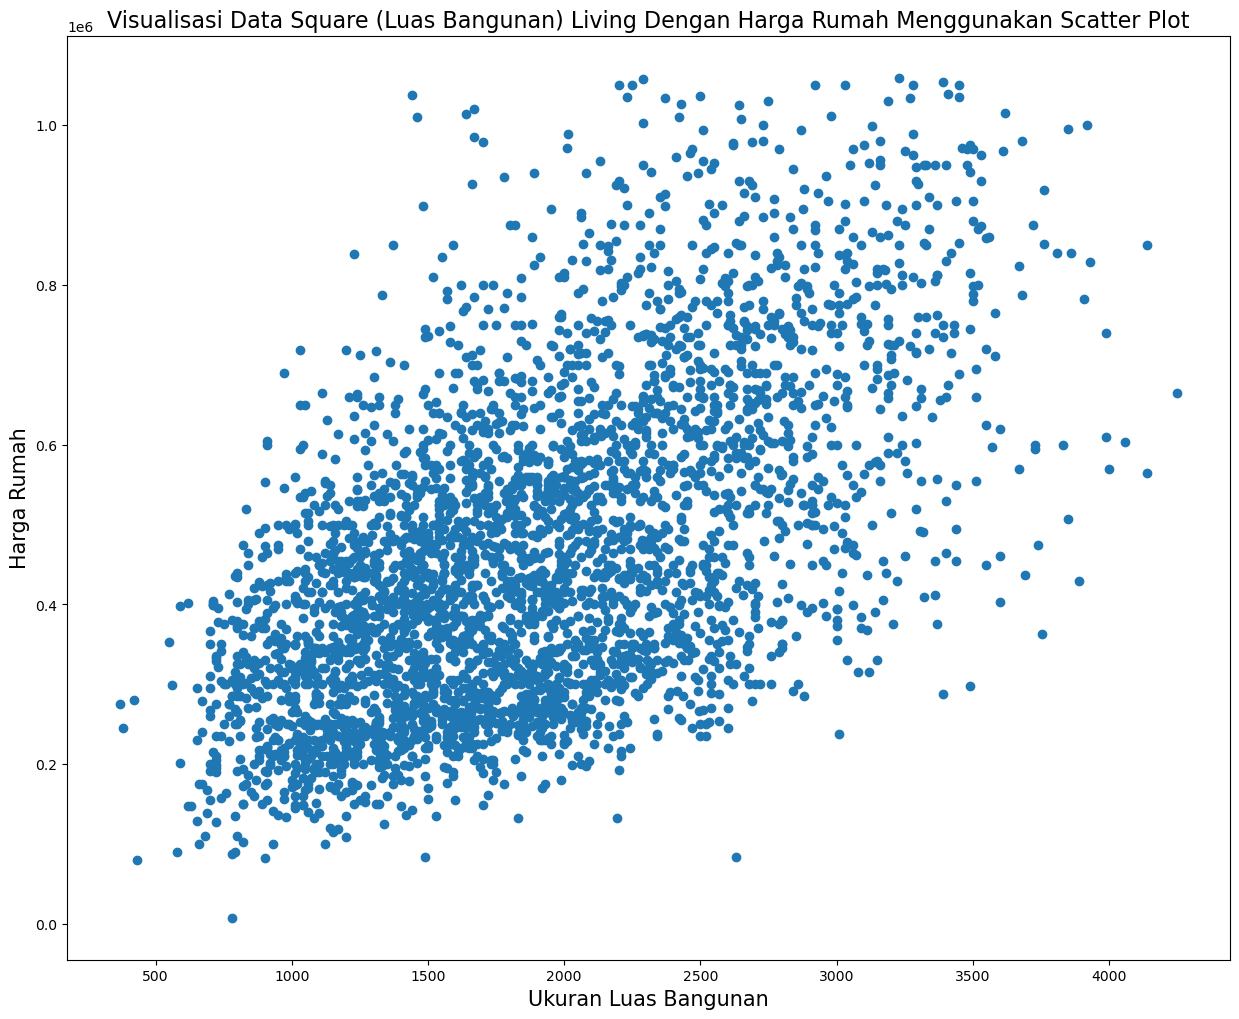

In [1156]:
# Scatter Plot Kolom Square Living Dengan Harga Rumah
fig,ax = plt.subplots(figsize=(15,12))
plt.scatter(df['sqft_living'],df['price'])
plt.title("Visualisasi Data Square (Luas Bangunan) Living Dengan Harga Rumah Menggunakan Scatter Plot",fontsize=16)
plt.xlabel("Ukuran Luas Bangunan", fontsize=15)
plt.ylabel("Harga Rumah",fontsize=15)
plt.show()

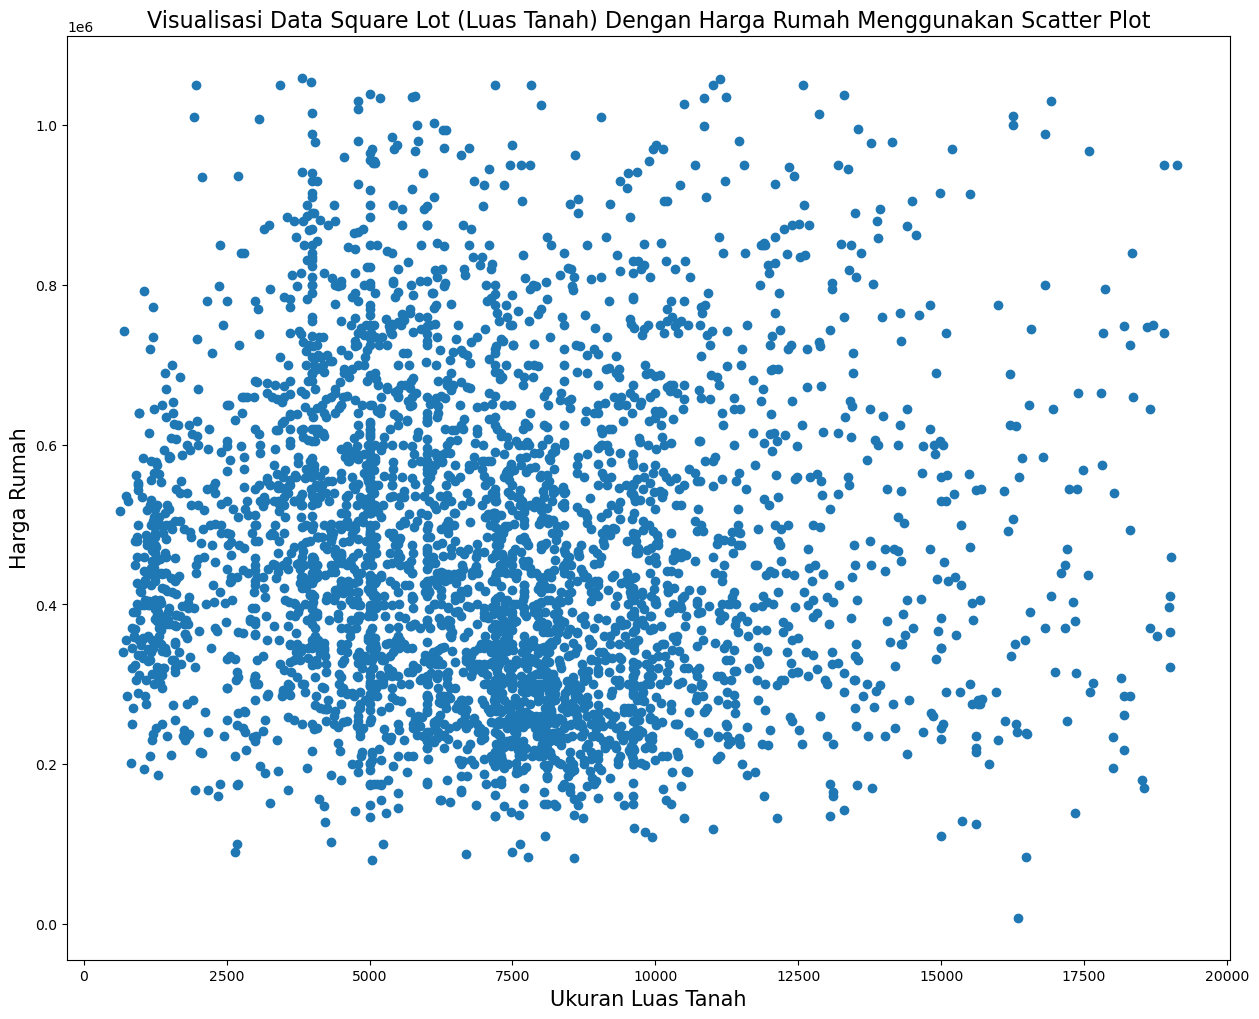

In [1157]:
# Scatter Plot Kolom Square Lot Dengan Harga Rumah
fig,ax = plt.subplots(figsize=(15,12))
plt.scatter(df['sqft_lot'],df['price'])
plt.title("Visualisasi Data Square Lot (Luas Tanah) Dengan Harga Rumah Menggunakan Scatter Plot",fontsize=16)
plt.xlabel("Ukuran Luas Tanah", fontsize=15)
plt.ylabel("Harga Rumah",fontsize=15)
plt.show()

<h3><b>KORELASI VARIABLE</b></h3>


<p><b>1.Melihat korelasi seluruh variabel</b></p>

In [1158]:
df.corr()

/tmp/ipykernel_5522/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
price,1.000000,0.278725,0.423044,0.582906,-0.014672,0.233052,0.075860,0.459256,-0.008554
bedrooms,0.278725,1.000000,0.497676,0.624820,0.209819,0.058286,0.020762,0.468285,0.145564
bathrooms,0.423044,0.497676,1.000000,0.699515,-0.016647,0.108689,-0.149132,0.612159,0.526210
sqft_living,0.582906,0.624820,0.699515,1.000000,0.224737,0.172807,-0.064778,0.815169,0.308506
sqft_lot,-0.014672,0.209819,-0.016647,0.224737,1.000000,0.066522,0.115684,0.182637,-0.026140
view,0.233052,0.058286,0.108689,0.172807,0.066522,1.000000,0.047740,0.041042,-0.075146
condition,0.075860,0.020762,-0.149132,-0.064778,0.115684,0.047740,1.000000,-0.211293,-0.407354
sqft_above,0.459256,0.468285,0.612159,0.815169,0.182637,0.041042,-0.211293,1.000000,0.459526
yr_built,-0.008554,0.145564,0.526210,0.308506,-0.026140,-0.075146,-0.407354,0.459526,1.000000


<p><b>2.Memvisualisasikan Korelasi Semua Variabel Dengan Heatmap</b></p>

/tmp/ipykernel_5522/2187882668.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = df.corr()


<Axes: title={'center': 'Memvisualisasikan Korelasi Antar Variabel Menggunakan Heatmap'}>

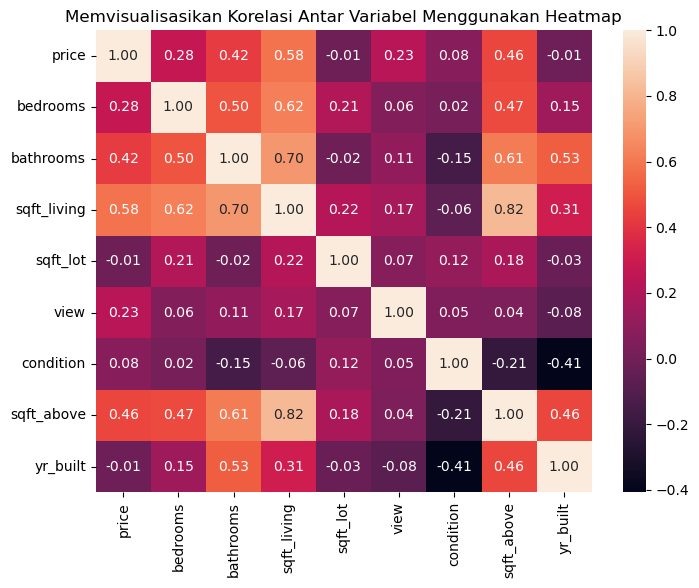

In [1159]:
plt.figure(figsize=(8,6))
korelasi = df.corr()
plt.title("Memvisualisasikan Korelasi Antar Variabel Menggunakan Heatmap")
sns.heatmap(korelasi,annot=True,fmt='.2f')

<p><b>3.Membuat Fungsi Untuk Mengecek Korelasi 1 Variabel Dengan Variabel Lainnya</b></p>

In [1160]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'view', 'condition', 'sqft_above', 'yr_built'],
      dtype='object')

In [1161]:
def cek_korelasi(dataset=df,kolomDependen='price',arrKolomIndependent=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'view', 'condition', 'sqft_above', 'yr_built']):
    for data in arrKolomIndependent:
        pearson_corr,p_value = stats.pearsonr(dataset[kolomDependen],dataset[data])
        
        if data == kolomDependen:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Memiliki Korelasi Pearson Sempurna Di Karenakan Kedua Kolom Sama!")
            print("")
        elif pearson_corr > 0.7:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr > 0.5:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr > 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr == 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Tidak Memilik Korelasi Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < -0.5:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Sedang Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < -0.7:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Kuat Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")

<p><b>4.Mengecek Korelasi Kolom 'price' dengan Semua Kolom Numeric</b></p>

In [1162]:
cek_korelasi(kolomDependen='price')

Dataset Kolom 'price' Dan 'price' Memiliki Korelasi Pearson Sempurna Di Karenakan Kedua Kolom Sama!

Dataset Kolom 'price' Dan 'bedrooms' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.27872491075442596

Dataset Kolom 'price' Dan 'bathrooms' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.4230435930011188

Dataset Kolom 'price' Dan 'sqft_living' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.5829056507619503

Dataset Kolom 'price' Dan 'sqft_lot' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : -0.014671900769803903

Dataset Kolom 'price' Dan 'view' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.2330517439026948

Dataset Kolom 'price' Dan 'condition' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.07585990604568513

Dataset Kolom 'price' Dan 'sqft_above' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.45925565057212236

Dataset Kolom 'price' Dan 'yr_built' Berkorelasi Negatif Lemah Dengan Nilai Korelasi

<p><b>5.Mengecek Korelasi Kolom 'sqft_living' dengan Semua Kolom Numeric</b></p>

In [1163]:
cek_korelasi(kolomDependen='sqft_living')

Dataset Kolom 'sqft_living' Dan 'price' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.5829056507619503

Dataset Kolom 'sqft_living' Dan 'bedrooms' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.6248199352471271

Dataset Kolom 'sqft_living' Dan 'bathrooms' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.6995149092997014

Dataset Kolom 'sqft_living' Dan 'sqft_living' Memiliki Korelasi Pearson Sempurna Di Karenakan Kedua Kolom Sama!

Dataset Kolom 'sqft_living' Dan 'sqft_lot' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.2247366592072651

Dataset Kolom 'sqft_living' Dan 'view' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.17280710986845718

Dataset Kolom 'sqft_living' Dan 'condition' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : -0.06477799669857759

Dataset Kolom 'sqft_living' Dan 'sqft_above' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : 0.8151688147506351

Dataset Kolom 'sqft_living' Dan 'yr_bu

<p><b>6.Mengecek Korelasi Kolom 'price' dengan Kolom Square Feet Living,Lot,Dan Above</b></p>

In [1164]:
data = ['sqft_living','sqft_lot','sqft_above']
cek_korelasi(kolomDependen='price',arrKolomIndependent=data)

Dataset Kolom 'price' Dan 'sqft_living' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.5829056507619503

Dataset Kolom 'price' Dan 'sqft_lot' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : -0.014671900769803903

Dataset Kolom 'price' Dan 'sqft_above' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.45925565057212236



<h3><b>REGRESI</b></h3>

<h4><b>LINEAR REGRESI DENGAN 1 VARIABEL BEBAS</b></h4>

<p><b>1.Mempersiapkan data (Mendeklarasikan Variabel Bebas dan Variabel Terikat)</b></p>

In [1165]:
X = df[['sqft_living']]
y = df['price']

<p><b>2.Membagi Data Menjadi 2 Yaitu Data Train dan Data Test</b></p>

In [1166]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=100);

<p><b>3.Melihat Jumlah Data Train Dan Test</b></p>

In [1167]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (2772, 1)
Jumlah Data X Test :  (924, 1)
Jumlah Data y Train :  (2772,)
Jumlah Data y Test :  (924,)


<p><b>4.Membuat Model Linear Regresi</b></p>

In [1168]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Menampikan Nilai Koefisien Dan Intercept</b></p>

In [1169]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [172.18935857]
Nilai Intercept :  139631.24188942066


<p><b>6.Memvisualisasi Linear Regresi Dengan Scatter Plot</b></p>

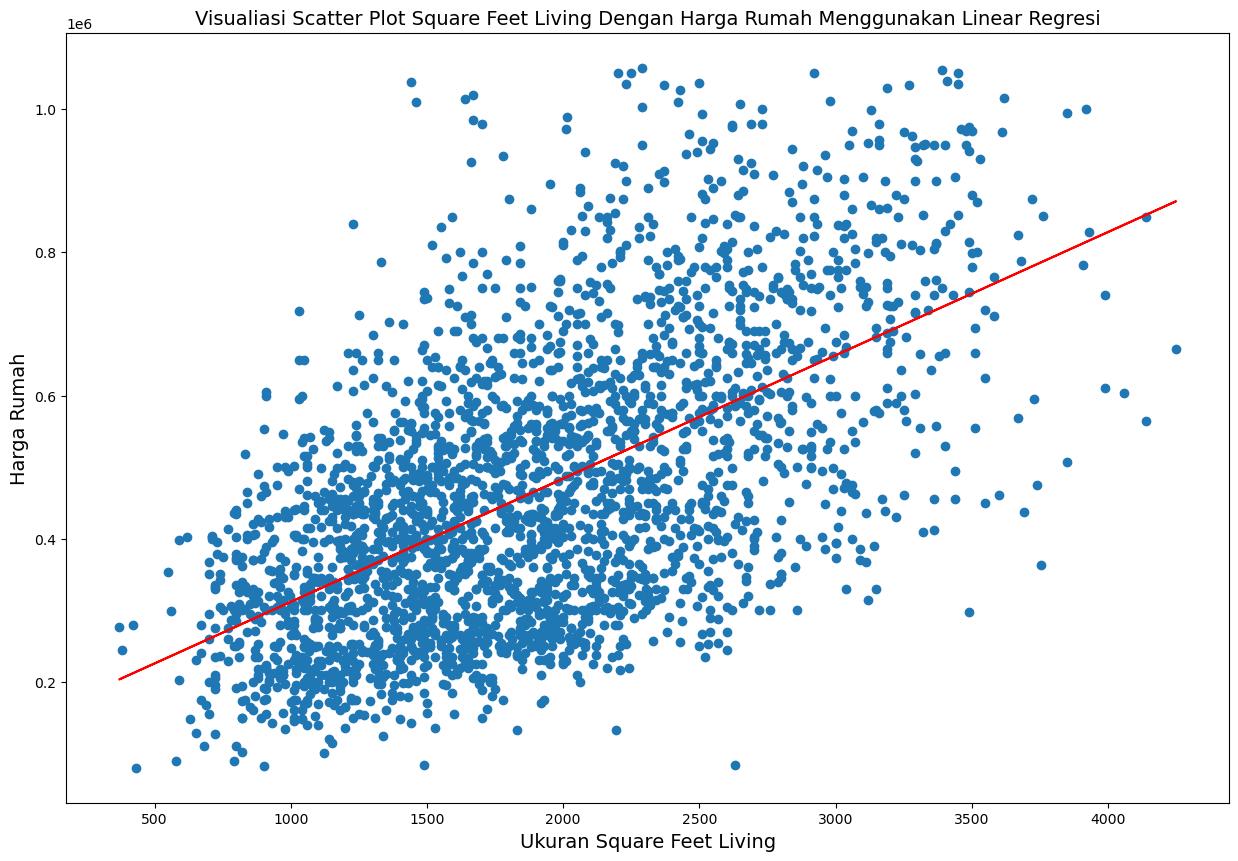

In [1170]:
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train,y_train)
ax.plot(X_train, linreg_model.coef_[0]*X_train + linreg_model.intercept_, '-r')
plt.title("Visualiasi Scatter Plot Square Feet Living Dengan Harga Rumah Menggunakan Linear Regresi",fontsize="14")
plt.xlabel("Ukuran Square Feet Living",fontsize="14")
plt.ylabel("Harga Rumah",fontsize="14")
plt.show()

<p><b>7.Melakukan Prediksi Dari Model</b></p>

In [1171]:
y_pred = linreg_model.predict(X_test)

print("Data Harga Hasil Prediksi :",y_pred[0:10])
print("")
print("Data Harga Asli :",y_test[0:10])

Data Harga Hasil Prediksi : [373808.76955084 413412.32202299 339370.89783592 361755.51445062
 515004.04358198 425465.57712321 513282.14999624 299767.34536377
 372086.87596509 368643.0887936 ]

Data Harga Asli : 1587    399500.0
3105    670500.0
2105    468000.0
2857    605000.0
1611    400000.0
1792    425000.0
1736    415000.0
8       100000.0
1669    405500.0
2683    565000.0
Name: price, dtype: float64


<p><b>8.Evaluasi Model</b></p>

In [1172]:
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  161282.1149174751
Mean Absolute Error (MAE):  131379.22257159778
Mean Squared Error (MSE):  26011920592.25364


<h4><b>LINEAR REGRESI DENGAN 3 VARIABEL BEBAS</b></h4>

<p><b>1.Mempersiapkan data (Mendeklarasikan Variabel Bebas dan Variabel Terikat)</b></p>

In [1173]:
variabelBebas = ['sqft_lot','sqft_above','sqft_living']
X = df[variabelBebas]
y = df['price']

<p><b>2.Membagi Data Menjadi 2 Yaitu Data Train dan Data Test</b></p>

In [1174]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=100);

<p><b>3.Melihat Jumlah Data Train Dan Test</b></p>

In [1175]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (2587, 3)
Jumlah Data X Test :  (1109, 3)
Jumlah Data y Train :  (2587,)
Jumlah Data y Test :  (1109,)


<p><b>4.Membuat Model Linear Regresi</b></p>

In [1176]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Menampikan Nilai Koefisien Dan Intercept</b></p>

In [1177]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [ -7.61907934 -17.08875795 193.86282579]
Nilai Intercept :  180853.85619649861


<p><b>6.Memvisualisasi Linear Regresi Dengan Scatter Plot</b></p>

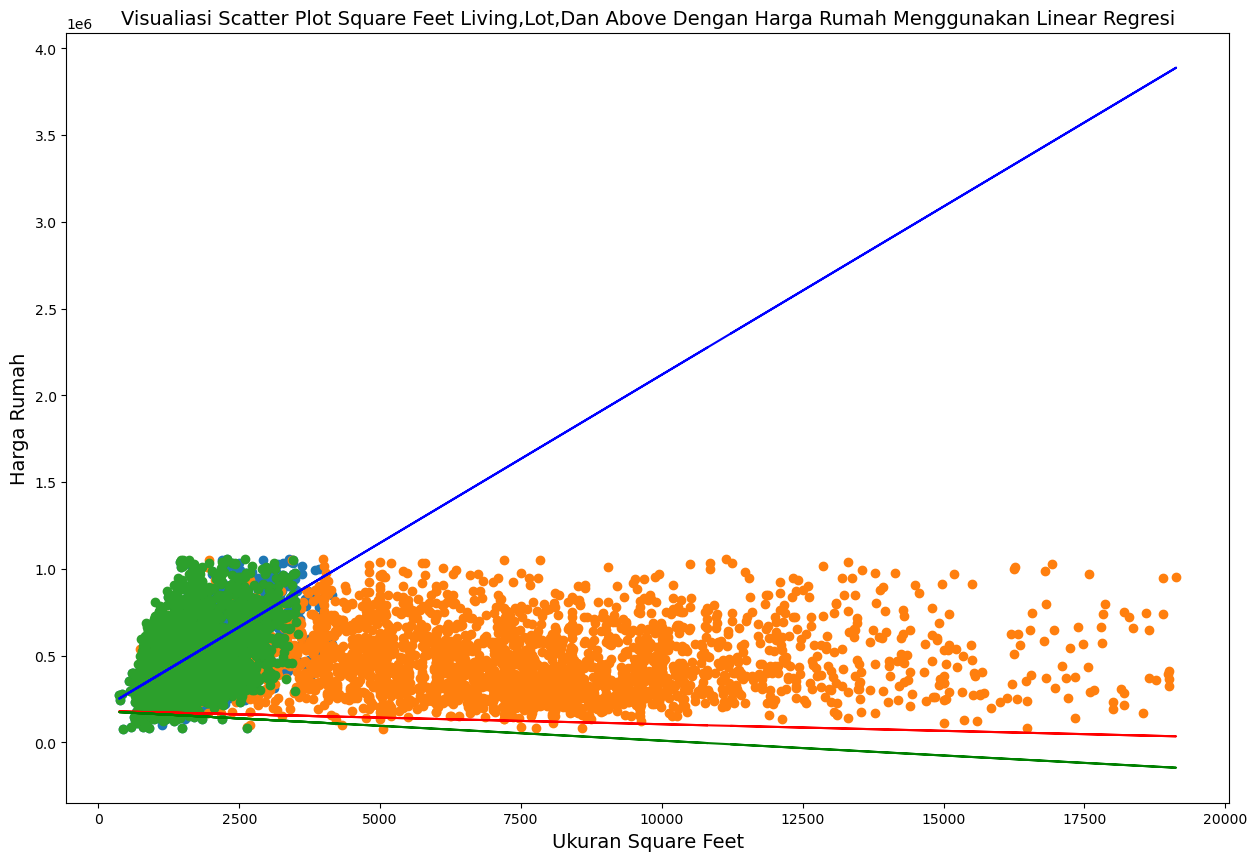

In [1178]:
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train['sqft_living'],y_train)
plt.scatter(X_train['sqft_lot'],y_train)
plt.scatter(X_train['sqft_above'],y_train)
ax.plot(X_train, linreg_model.coef_[0]*X_train + linreg_model.intercept_, '-r')
ax.plot(X_train, linreg_model.coef_[1]*X_train + linreg_model.intercept_, '-g')
ax.plot(X_train, linreg_model.coef_[2]*X_train + linreg_model.intercept_, '-b')
plt
plt.title("Visualiasi Scatter Plot Square Feet Living,Lot,Dan Above Dengan Harga Rumah Menggunakan Linear Regresi",fontsize="14")
plt.xlabel("Ukuran Square Feet",fontsize="14")
plt.ylabel("Harga Rumah",fontsize="14")
plt.show()

<p><b>7.Melakukan Prediksi Dari Model</b></p>

In [1179]:
y_pred = linreg_model.predict(X_test)

print("Data Harga Hasil Prediksi :",y_pred[0:5])
print("")
print("Data Harga Asli :",y_test[0:5])

Data Harga Hasil Prediksi : [384390.24443126 410495.83848825 345323.9262128  389844.70534509
 522004.73241282]

Data Harga Asli : 1587    399500.0
3105    670500.0
2105    468000.0
2857    605000.0
1611    400000.0
Name: price, dtype: float64


<p><b>8.Evaluasi Model</b></p>

In [1180]:
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  155631.09215130965
Mean Absolute Error (MAE):  124748.18525285357
Mean Squared Error (MSE):  24221036844.20944
